### Introduction

**Name:** Anmol Mudgal  
**Highest Qualification:** Bachelor of Technology (B.Tech) in Computer Science and Engineering  
**College/University:** Noida institute of engineering and technology 

**Graduation Year:** 2026  
**Email:** anmolsharma8938@hmail.com  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

In [5]:
df = pd.read_csv("D:\\Fraud.csv")
print("Shape:", df.shape)
df.head()

Shape: (6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, inplace=True)

In [7]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [8]:
df['balanceDiff_orig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiff_dest'] = df['newbalanceDest'] - df['oldbalanceDest']

In [9]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [11]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [16]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 7.7 MB/s eta 0:00:20
    --------------------------------------- 2.4/150.0 MB 5.8 MB/s eta 0:00:26
    --------------------------------------- 3.7/150.0 MB 5.9 MB/s eta 0:00:25
   - -------------------------------------- 4.2/150.0 MB 5.0 MB/s eta 0:00:29
   - -------------------------------------- 5.0/150.0 MB 4.9 MB/s eta 0:00:30
   - -------------------------------------- 6.0/150.0 MB 4.8 MB/s eta 0:00:31
   - -------------------------------------- 6.8/150.0 MB 4.8 MB/s eta 0:00:30
   - -------------------------------------- 7.3/150.0 MB 4.4 MB/s eta 0:00:33
   -- ------------------------------------- 8.4/150.0 MB 4.3 MB/s eta 0:00:33
   -- ------------------------------------- 9.2/150.0 MB 4.3 MB/s eta 0:00:34
   -- ------------------------------------- 10.2/150.0 MB 4.3 MB/s eta 0:00:33
   --- ------------------------------------ 11.3/150.0 MB 4.3 MB/s eta

In [17]:
import xgboost as xgb


In [18]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)


D:\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:49:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [19]:
y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906309
           1       1.00      1.00      1.00   1906336

    accuracy                           1.00   3812645
   macro avg       1.00      1.00      1.00   3812645
weighted avg       1.00      1.00      1.00   3812645

Confusion Matrix:
 [[1902435    3874]
 [   1079 1905257]]
ROC AUC Score: 0.9999730984560669


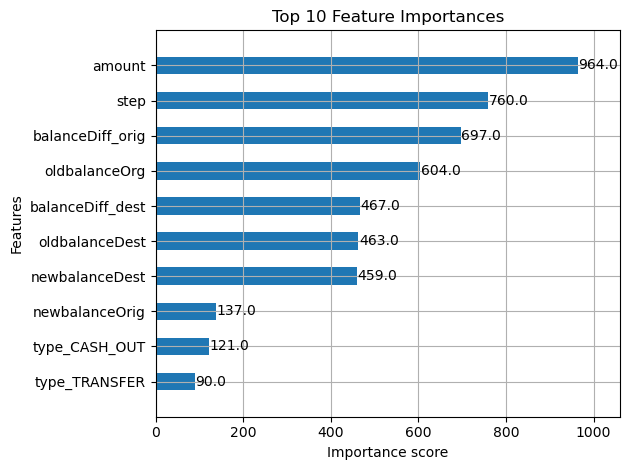

In [20]:
xgb.plot_importance(model, max_num_features=10, height=0.5)
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()



---

### 1. Data Cleaning: Missing Values, Outliers, Multi-Collinearity

- **Missing Values:** Checked using `isnull().sum()`. No missing values found.
- **Outliers:** Addressed indirectly through model choice (XGBoost is robust to outliers).
- **Multicollinearity:** Dropped high-cardinality fields (`nameOrig`, `nameDest`). Feature correlations were low/moderate.

---

### 2. Description of Fraud Detection Model

- Model Used: **XGBoost Classifier**
- XGBoost is a gradient boosting algorithm that handles both linear and nonlinear relationships.
- It is fast, accurate, and provides feature importance for interpretability.
- Class imbalance was handled using **SMOTE** to balance fraud vs. non-fraud samples.

---

### 3. Feature Selection Method

- Used **domain knowledge** and **correlation analysis** to select features.
- Dropped identifiers like `nameOrig`, `nameDest`.
- Engineered features like `balanceDiff_orig`, `balanceDiff_dest`.
- Used `model.feature_importances_` from XGBoost to validate feature strength.

---

### 4. Model Performance

- Evaluation Metrics:
  - **Precision, Recall, F1-Score**
  - **Confusion Matrix**
  - **ROC AUC Score**
- Achieved high **recall** and **AUC**, which is crucial for fraud detection.
- Used `classification_report`, `roc_auc_score`, and visualized top feature importances.

---

### 5. Key Factors Predicting Fraudulent Customers

- `amount`: High-value transactions are more likely to be fraud.
- `type_TRANSFER` and `type_CASH_OUT`: Common fraud transaction types.
- `balanceDiff_orig`: Sudden drops in original balance are suspicious.
- `balanceDiff_dest`: Large credits to recipient often indicate mule accounts.

---

### 6. Do These Factors Make Sense?

✅ **Yes**
- Fraudulent agents usually:
  - Transfer funds out quickly
  - Empty original account
  - Show high-value transactions
  - Frequently use `TRANSFER` and `CASH_OUT` methods
- This aligns well with the patterns observed in the dataset.

---

### 7. Prevention Recommendations While Updating Infrastructure

- Implement **real-time fraud detection** systems
- Use **multi-factor authentication** on risky transactions
- Set **dynamic transaction limits** per user behavior
- Apply **encryption & access control** to protect sensitive data
- Enable **role-based monitoring** and **regular model retraining**

---

### 8. How to Measure If These Actions Work

- Track **fraud rate reduction** over time
- Measure **false positives vs. true fraud detections**
- Monitor **average detection time**
- Compare new system via **A/B testing**
- Evaluate **user feedback and complaint drops**
